Pengulangan Latihan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Mengimport file 'titanic.csv' untuk di agregasi serta melakukan pengecekan nama nama kolom yang terdapat pada file tersebut

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Melakukan pengecekan data, terdapat 891 baris entry, dapat dilihat untuk kolom 'Age' dan kolom 'Cabin' memiliki null data yang selanjutnya akan di agregasi

Data Cleansing

In [4]:
df['Age'].isnull().sum()

np.int64(177)

Mencari tahu berapa banyak jumlah data null pada kolom 'Age'

In [5]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_21580\1007545618.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


Melakukan Agregasi pada kolom 'Age' dengan mengisinya dengan nilai median kolomnya karena data nullnya tidak terlalu banyak (Hanya 20%)

In [6]:
# Data Cleansing Cabin
df['Cabin'].isnull().sum()

np.int64(687)

Mencari tahu berapa banyak data null yang terdapat pada kolom 'Cabin'

In [7]:
df = df.drop('Cabin', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Melakukan penghapusan kolom 'Cabin' karena data nullnya mencapai 77% 

In [8]:
df['Embarked'].isnull().sum()

np.int64(2)

Mencari tahu jumlah data null pada kolom 'Embarked'

In [9]:
# Data Cleansing Embarked

df['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Menghitung Berapa Banyak penumpang yang berangkat (embarked) dari masing masing pelabuhan (S,C, dan Q)

In [10]:
#Mengisi kolom embarked yang kosong dengan nilai terbanyak
df['Embarked'].fillna('S', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


C:\Users\ACER\AppData\Local\Temp\ipykernel_21580\3787616692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna('S', inplace=True)


Melakukan Agregasi data dengan pengisian pada kolom 'Embarked' menggunakan value terbanyak, sekaligus melakukan pengecekan kembali apakah data sudah sepenuhnya terisi dan sudah tidak ada lagi null

Grafik distribusi usia telah disimpan sebagai 'age_distribution.png'.


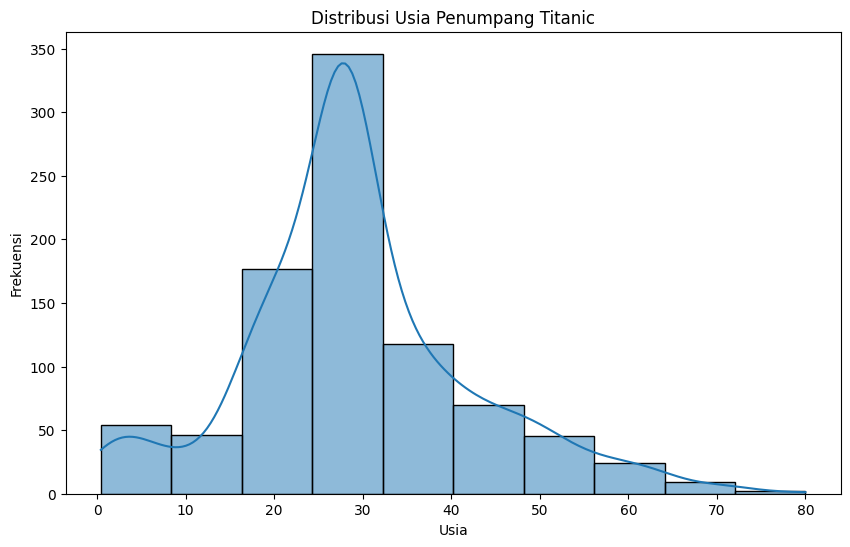

In [11]:
#Distribusi data setelah pembersihan
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Distribusi Usia Penumpang Titanic')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.savefig('age_distribution.png')
print("Grafik distribusi usia telah disimpan sebagai 'age_distribution.png'.")
plt.show()

## 📊 Analisis Distribusi Usia Penumpang Titanic (Histogram)

Grafik Histogram di atas menunjukkan **distribusi (sebaran) usia** dari seluruh penumpang Titanic. Kurva biru di atas batang-batang (Kernel Density Estimate / KDE) membantu memperhalus visualisasi pola penyebaran data.

### Poin Kunci Analisis:

* **Jangkauan Usia:** Usia penumpang sangat beragam, mulai dari bayi hingga sekitar **80 tahun**.
* **Pola Distribusi (*Skewness*):** Distribusi usia terlihat **condong ke kanan** (*right-skewed*), yang berarti mayoritas penumpang terkumpul di usia muda.
* **Puncak (Modus):** Mayoritas besar penumpang, yang merupakan **kelompok usia terbanyak**, berada dalam rentang **usia pertengahan 20-an sampai awal 30-an tahun**.

**Kesimpulan:** Kapal di didominasi oleh penumpang berusia dewasa muda yang merupakan usia produktif.

Total Penumpang: 891
Penumpang Pria: 577 (64.76%)
Penumpang Wanita: 314 (35.24%)
Diagram proporsi telah disimpan sebagai 'Proporsi Penumpang Berdasarkan Jenis Kelaminstribution.png'.


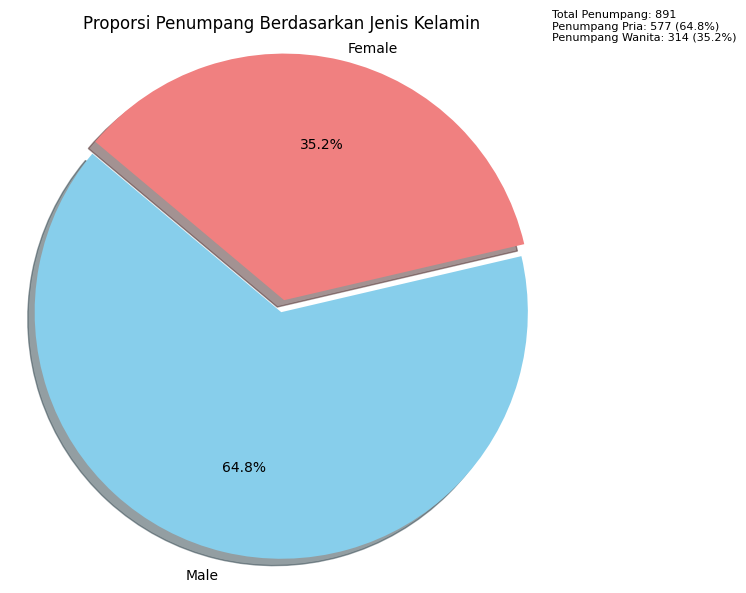

In [53]:
# Persentase Penumpang Berdasarkan Jenis Kelamin
total_passengers = len(df)
male_passengers = len(df[df['Sex'] == 'male'])
female_passengers = len(df[df['Sex'] == 'female'])
male_percentage = (male_passengers / total_passengers) * 100
female_percentage = (female_passengers / total_passengers) * 100
print(f'Total Penumpang: {total_passengers}')
print(f'Penumpang Pria: {male_passengers} ({(male_percentage):.2f}%)')
print(f'Penumpang Wanita: {female_passengers} ({(female_percentage):.2f}%)')

# Visualisasi Persentase Penumpang Berdasarkan Jenis Kelamin
labels = ['Male', 'Female']
sizes = [male_passengers, female_passengers] # Menggunakan jumlah langsung atau persentase
colors = ['skyblue', 'lightcoral']
explode = (0.05, 0)  # Untuk sedikit memisahkan irisan 'Male'

# ... (Kode persiapan data dan pyplot)

plt.figure(figsize=(7, 7))
# 1. TANGKAP OBJEK TEKS DI SINI
wedges, texts, autotexts = plt.pie(
    sizes, explode=explode, labels=labels, colors=colors,
    autopct='%1.1f%%', shadow=True, startangle=140,
    pctdistance=0.65 # Opsional: menyesuaikan jarak persentase
)

plt.title('Proporsi Penumpang Berdasarkan Jenis Kelamin')
plt.axis('equal')

# 2. AKSES DAN GESER LABEL 'FEMALE' (Indeks 1)
x_label, y_label = texts[1].get_position()
texts[1].set_position((x_label, y_label - 0.05)) # <-- Posisi label

# 3. Opsional: Sesuaikan properti teks lain untuk keterbacaan
for autotext in autotexts:
    autotext.set_color('black') # mengatur warna teks persentase
    autotext.set_fontsize(10)   # mengatur ukuran font persentase

# ... (Kode plt.pie() dan manipulasi label)

# --- Tambahkan Anotasi Teks (Detail Penumpang) ---
plt.text(
    x=1, # Koordinat X (Geser ke kanan. Sesuaikan nilai ini.)
    y=1.05, # Koordinat Y (Geser ke atas. Sesuaikan nilai ini.)
    s=f"Total Penumpang: {len(df)}\n"
      f"Penumpang Pria: {male_passengers} ({male_percentage:.1f}%)\n"
      f"Penumpang Wanita: {female_passengers} ({female_percentage:.1f}%)",
    transform=plt.gca().transAxes, # Penting: menggunakan koordinat relatif (0 hingga 1.0)
    fontsize=8,
    verticalalignment='top'
)
plt.savefig('Proporsi Penumpang Berdasarkan Jenis Kelamin.png')
print("Diagram proporsi telah disimpan sebagai 'Proporsi Penumpang Berdasarkan Jenis Kelaminstribution.png'.")

plt.show()

### 🧑‍🤝‍👩 Proporsi Penumpang Berdasarkan Jenis Kelamin


> **Analisis:** Diagram di atas menunjukkan persentase penumpang Pria dan Wanita dalam dataset (total 891 penumpang). Dapat disimpulkan bahwa **Pria mendominasi** jumlah penumpang dengan persentase **64.8%**, sementara Wanita memiliki persentase **35.2%**.

Box plot peluang kelangsungan hidup berdasarkan usia telah disimpan sebagai 'Peluang Kelangsungan Hidup Berdasarkan Usia.png'.


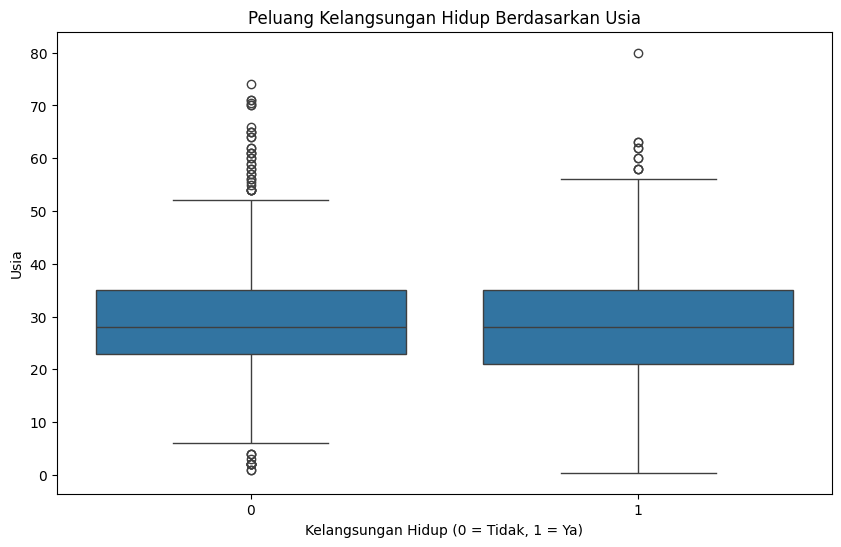

In [54]:
#Peluang kelangsungan hidup berdasarkan usia setelah pembersihan data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Peluang Kelangsungan Hidup Berdasarkan Usia')
plt.xlabel('Kelangsungan Hidup (0 = Tidak, 1 = Ya)')
plt.ylabel('Usia')
plt.savefig('Peluang Kelangsungan Hidup Berdasarkan Usia.png')
print("Box plot peluang kelangsungan hidup berdasarkan usia telah disimpan sebagai 'Peluang Kelangsungan Hidup Berdasarkan Usia.png'.")
plt.show()


### 📉 Peluang Kelangsungan Hidup Berdasarkan Usia


> **Analisis dan Temuan Utama:**
> 
> Diagram kotak (Boxplot) ini membandingkan distribusi usia antara penumpang yang **Tidak Selamat (0)** dan yang **Selamat (1)**.
> 
> * **Median Usia:** Median usia (garis tengah kotak) antara kelompok Selamat dan Tidak Selamat **cukup mirip**, yaitu berada di kisaran **30 tahun**.
> * **Rentang Interkuartil (IQR):** Rentang usia mayoritas penumpang (kotak biru) juga terlihat **serupa** untuk kedua kelompok, menunjukkan bahwa sebagian besar penumpang dewasa memiliki risiko yang relatif sama.
> * **Outliers:** Terdapat beberapa *outliers* (titik di luar sumbu) yang menunjukkan bahwa **beberapa anak kecil** (usia sangat rendah) dan **orang tua** (usia sangat tinggi) juga termasuk dalam kelompok yang selamat maupun tidak selamat.
> 
> **Kesimpulan Mini:** Berdasarkan boxplot, **usia secara umum** (median dan IQR) **bukanlah faktor penentu tunggal** yang membedakan antara penumpang yang selamat dan tidak selamat.

C:\Users\ACER\AppData\Local\Temp\ipykernel_21580\1875851743.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')


Bar plot persentase kelangsungan hidup berdasarkan kelas penumpang telah disimpan sebagai 'Persentase Kelangsungan Hidup Berdasarkan Kelas Penumpang.png'.


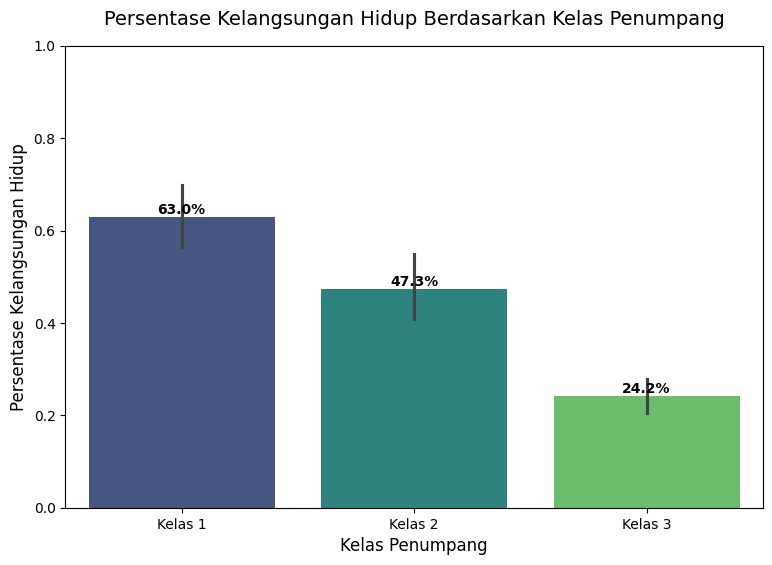

In [62]:
# Persentase kelangsungan hidup berdasarkan kelas penumpang
# 1. Buat Figure & Axes
plt.figure(figsize=(9, 6))

# 2. Grafik Persentase Kelangsungan Hidup (Survival Rate) berdasarkan PClass
# sns.barplot menggunakan rata-rata kolom 'Survived' (0 atau 1), yang menghasilkan Survival Rate
ax = sns.barplot(x='Pclass', y='Survived', data=df, palette='viridis')

# 3. Anotasi Persentase di Atas Setiap Bar (Untuk Akurasi)
# Hitung Survival Rate untuk setiap kelas
survival_rates_class = df.groupby('Pclass')['Survived'].mean()

for p in ax.patches:
    # Dapatkan posisi X (0=Kelas 1, 1=Kelas 2, 2=Kelas 3)
    pclass_index = int(p.get_x() + p.get_width() / 2) 
    
    # Konversi index ke nilai PClass (1, 2, atau 3)
    pclass_value = survival_rates_class.index[pclass_index]
    
    # Dapatkan persentase survival
    rate = survival_rates_class[pclass_value] * 100
    text = f'{rate:.1f}%'
    
    # Posisikan teks
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), text,
            ha='center', va='bottom', fontsize=10, weight='bold', color='black')

# 4. Pengaturan Label dan Judul
plt.title('Persentase Kelangsungan Hidup Berdasarkan Kelas Penumpang', fontsize=14, pad=15)
plt.xlabel('Kelas Penumpang', fontsize=12)
plt.ylabel('Persentase Kelangsungan Hidup', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['Kelas 1', 'Kelas 2', 'Kelas 3']) # Ganti label sumbu X
plt.ylim(0, 1) # Survival rate maksimal 1.0 (100%)
plt.savefig('Persentase Kelangsungan Hidup Berdasarkan Kelas Penumpang.png')
print("Bar plot persentase kelangsungan hidup berdasarkan kelas penumpang telah disimpan sebagai 'Persentase Kelangsungan Hidup Berdasarkan Kelas Penumpang.png'.")
plt.show()

### 🎟️ Persentase Kelangsungan Hidup Berdasarkan Kelas Penumpang


> **Analisis dan Kesimpulan:**
> 
> Bar plot ini memvisualisasikan tingkat kelangsungan hidup (survival rate) di antara tiga kelas penumpang yang berbeda (Kelas 1, Kelas 2, dan Kelas 3).
> 
> * **Kelas 1:** Memiliki persentase kelangsungan hidup **tertinggi**, berada di atas **60%**. Bar ini juga menunjukkan *error bar* yang lebih pendek, mengindikasikan presisi yang relatif tinggi.
> * **Kelas 2:** Menunjukkan tingkat kelangsungan hidup sedang, berada di sekitar **45% - 50%**.
> * **Kelas 3:** Memiliki persentase kelangsungan hidup **terendah**, di bawah **25%**.
> 
> **Kesimpulan Kunci:** Terdapat **korelasi yang sangat kuat** antara kelas penumpang dan peluang kelangsungan hidup. Penumpang di **Kelas 1** memiliki peluang selamat yang jauh lebih tinggi dibandingkan penumpang di Kelas 2 dan terutama Kelas 3, menegaskan adanya **prioritas sosial** atau **perbedaan akses** ke sekoci.

Bar plot persentase kelangsungan hidup berdasarkan jenis kelamin telah disimpan sebagai 'Persentase Kelangsungan Hidup Berdasarkan Jenis Kelamin.png'.


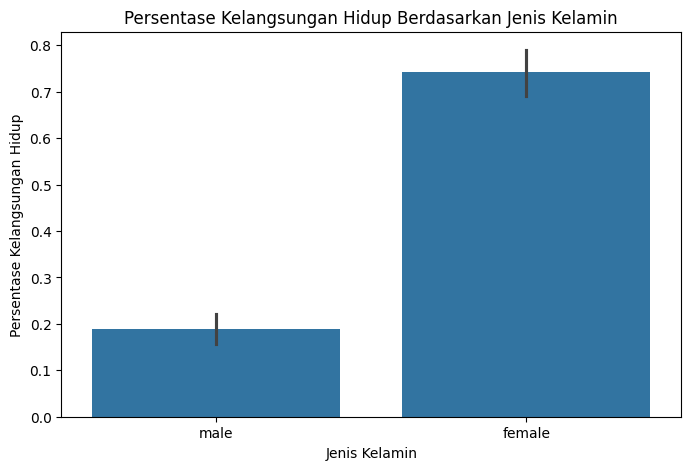

In [56]:
#Persentase kelangsungan hidup berdasarkan jenis kelamin
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Persentase Kelangsungan Hidup Berdasarkan Jenis Kelamin')    
plt.xlabel('Jenis Kelamin')
plt.ylabel('Persentase Kelangsungan Hidup')
plt.savefig('Persentase Kelangsungan Hidup Berdasarkan Jenis Kelamin.png')
print("Bar plot persentase kelangsungan hidup berdasarkan jenis kelamin telah disimpan sebagai 'Persentase Kelangsungan Hidup Berdasarkan Jenis Kelamin.png'.")
plt.show()


## 🚢 Analisis Distribusi Kelangsungan Hidup Berdasarkan Jenis Kelamin (Titanic)

### **Visualisasi:**

* Diagram batang ini memvisualisasikan tingkat kelangsungan hidup (**survival rate**) berdasarkan jenis kelamin (Pria dan Wanita).

### **Hasil Kunci (Key Findings):**

* **Wanita (Female)** memiliki persentase kelangsungan hidup **jauh lebih tinggi** dibandingkan Pria.
    * Persentase kelangsungan hidup Wanita berada di sekitar **~74%**.
    * Persentase kelangsungan hidup Pria berada di sekitar **~18%**.

### **Kesimpulan Kuat:**

* Terdapat **korelasi yang sangat kuat** antara jenis kelamin dengan peluang kelangsungan hidup.
* Hal ini sangat mencerminkan kebijakan **"Women and Children First"** yang diterapkan selama proses evakuasi.

---

### **Poin-Poin Penting dalam Analisis Laporan:**

1.  **Deskripsi Grafik:** Menyebutkan metrik yang dibandingkan (Persentase Kelangsungan Hidup) dan kategori pembanding (Jenis Kelamin).
2.  **Angka Kunci:** Memberikan estimasi persentase untuk setiap kategori (contoh: 74% vs 18%).
3.  **Kesimpulan Kuat:** Merangkum temuan (adanya korelasi/perbedaan peluang) dan menjelaskan implikasinya (keterkaitan dengan protokol penyelamatan).

Diagram jumlah penumpang dan persentase bertahan hidup berdasarkan jenis kelamin telah disimpan sebagai 'Jumlah Penumpang Pria dan Wanita serta Persentase Bertahan Hidup Berdasarkan Jenis Kelaminnya.png'.


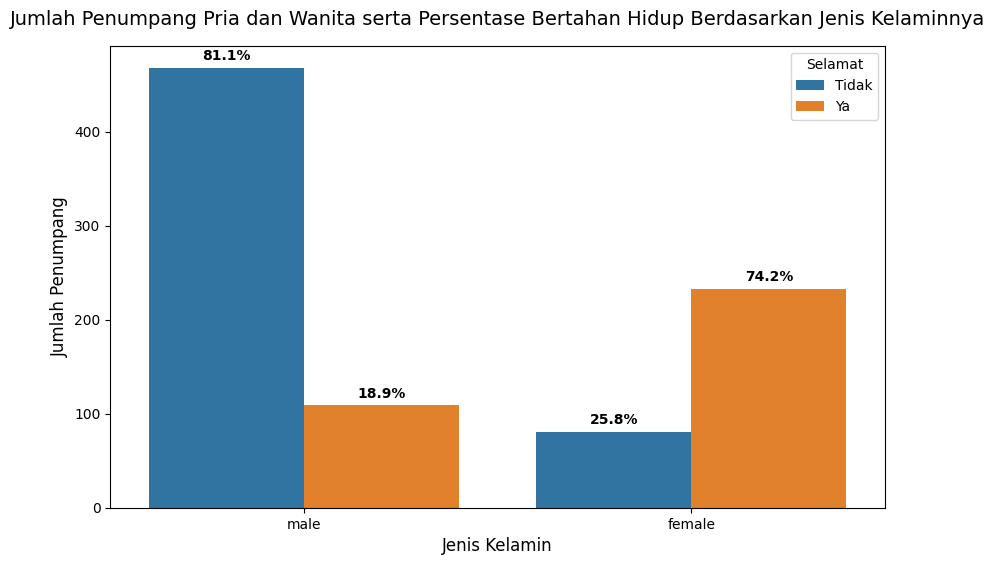

In [57]:
# Asumsi df, 'Sex', 'Survived'

# 1. Agregasi Data untuk Perhitungan Persentase dan Kematian
# Hitung total penumpang per jenis kelamin
total_counts = df['Sex'].value_counts()
# Hitung jumlah selamat (Survived=1)
survival_counts = df[df['Survived'] == 1]['Sex'].value_counts()
# Hitung jumlah tidak selamat (Survived=0)
death_counts = df[df['Survived'] == 0]['Sex'].value_counts()

# Hitung Persentase
persen_survival = (survival_counts / total_counts) * 100
persen_death = (death_counts / total_counts) * 100

# 2. Buat Figure & Axes
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=df) 
plt.title('Jumlah Penumpang Pria dan Wanita serta Persentase Bertahan Hidup Berdasarkan Jenis Kelaminnya', fontsize=14, pad=15)


# 3. Anotasi Persentase (Metode Robust)

# Tentukan posisi x bar secara manual (dilihat dari plot Seaborn)
# Posisi Male: x=-0.2 (Tidak Selamat), x=0.2 (Selamat)
# Posisi Female: x=0.8 (Tidak Selamat), x=1.2 (Selamat)

# --- Anotasi Pria (Male) ---
# Teks: Persentase Kematian Pria
ax.text(-0.2, death_counts['male'] + 5, f"{persen_death['male']:.1f}%", 
        ha='center', va='bottom', fontsize=10, weight='bold')

# Teks: Persentase Survival Pria
ax.text(0.2, survival_counts['male'] + 5, f"{persen_survival['male']:.1f}%", 
        ha='center', va='bottom', fontsize=10, weight='bold')


# --- Anotasi Wanita (Female) ---
# Teks: Persentase Kematian Wanita
ax.text(0.8, death_counts['female'] + 5, f"{persen_death['female']:.1f}%", 
        ha='center', va='bottom', fontsize=10, weight='bold')

# Teks: Persentase Survival Wanita
ax.text(1.2, survival_counts['female'] + 5, f"{persen_survival['female']:.1f}%", 
        ha='center', va='bottom', fontsize=10, weight='bold')

# 4. Pengaturan Label dan Output
plt.xlabel('Jenis Kelamin', fontsize=12)
plt.ylabel('Jumlah Penumpang', fontsize=12)
plt.legend(title='Selamat', labels=['Tidak', 'Ya']) 
plt.savefig('Jumlah Penumpang Pria dan Wanita serta Persentase Bertahan Hidup Berdasarkan Jenis Kelaminnya.png')
print("Diagram jumlah penumpang dan persentase bertahan hidup berdasarkan jenis kelamin telah disimpan sebagai 'Jumlah Penumpang Pria dan Wanita serta Persentase Bertahan Hidup Berdasarkan Jenis Kelaminnya.png'.")
plt.show()

## ANALISIS UTAMA: Jumlah Penumpang vs. Kelangsungan Hidup Berdasarkan Jenis Kelamin

Grafik batang kelompok ini memberikan gambaran komprehensif mengenai [JUMLAH ABSOLUT] penumpang dan [TINGKAT PERSENTASE] kelangsungan hidup.

---

### KELOMPOK PRIA (MALE)

* [KORBAN MAYORITAS]: Secara volume, Pria mendominasi kolom [TIDAK SELAMAT].
* [TINGKAT KEMATIAN MENCENGKRAM]: Tingkat kematian Pria sangat tinggi, mencapai 81.1%. Ini berarti [LEBIH DARI EMPAT PERLIMA] penumpang Pria tidak selamat.
* [PELUANG HIDUP RENDAH]: Hanya 18.9% Pria yang berhasil diselamatkan.

### KELOMPOK WANITA (FEMALE)

* [TINGKAT SURVIVAL TINGGI]: Tingkat kelangsungan hidup Wanita sangat tinggi, mencapai 74.2%. Hal ini ditunjukkan oleh balok [SELAMAT] yang dominan.
* [KORBAN MINORITAS]: Tingkat kematian Wanita relatif rendah, yaitu 25.8%.
* [PENYINTAS MAYORITAS]: Dibandingkan total populasi Wanita, [MAYORITAS (TIGA PEREMPAT)] berhasil selamat.

---

[KESIMPULAN KUNCI DAN IMPLIKASI]

> BUKTI KODE ETIK PENYELAMATAN: Perbedaan ekstrem antara persentase kelangsungan hidup Pria (18.9%) dan Wanita (74.2%) secara kuat membuktikan implementasi protokol [WOMEN AND CHILDREN FIRST] yang diprioritaskan.

> JENIS KELAMIN SEBAGAI PREDIKTOR UTAMA: Visualisasi ini mengkonfirmasi bahwa [JENIS KELAMIN] adalah faktor dominan penentu kelangsungan hidup.

## ✨ ANALISIS GABUNGAN: Jenis Kelamin, Kelas Penumpang, dan Peluang Survival

Analisis ini menyajikan perbandingan *multivariat* dengan meninjau persentase kelangsungan hidup sambil mempertimbangkan **Confidence Interval (Error Bar)** untuk menentukan seberapa *pasti* perbedaan tersebut.

***

### **1. JENIS KELAMIN VS. KELAS: KORELASI TERKUAT**

* **Pria Kelas 3:** Kelompok ini memiliki tingkat kelangsungan hidup **terendah** secara keseluruhan (sekitar 15%).
* **Wanita Kelas 1:** Kelompok ini memiliki tingkat kelangsungan hidup **tertinggi** (mendekati 97%), menjadikannya kelompok paling aman di kapal.
* **Perbandingan Kontras:** Seorang Pria di Kelas 3 memiliki peluang selamat yang hampir **nol**, sementara seorang Wanita di Kelas 1 hampir pasti selamat.

### **2. INTERPRETASI ERROR BAR (Keandalan Estimasi)**

Error Bar (Garis Hitam pada Bar Plot) mewakili **95% Confidence Interval**. Ini menunjukkan *rentang* di mana peluang survival yang sebenarnya kemungkinan berada:

* **Tumpang Tindih (Overlap):** Jika Error Bar dari dua kelompok **tidak tumpang tindih**, maka perbedaan peluang selamat antar kedua kelompok tersebut **sangat signifikan secara statistik**.
* **Keandalan Estimasi:** Kelas 1 (63.0%) cenderung memiliki Error Bar yang **lebih pendek** daripada Kelas 2 atau 3, mengindikasikan bahwa estimasi peluang survival mereka **lebih stabil/pasti**.

### **3. KASUS KRITIS: Wanita Kelas Bawah vs. Pria Kelas Atas**

* **Bukti Dominasi Jenis Kelamin:** Peluang kelangsungan hidup **Wanita Kelas 3** (sekitar 50%) umumnya **masih lebih tinggi** dibandingkan **Pria Kelas 1** (sekitar 37%), membuktikan bahwa faktor **Jenis Kelamin** sering kali lebih dominan daripada faktor **Kelas Penumpang**.

***

### > KESIMPULAN KUNCI DAN IMPLIKASI (GABUNGAN)

> **DUALITAS PREDIKTOR:** Meskipun **Jenis Kelamin** adalah prediktor utama (sesuai protokol "Women and Children First"), **Kelas Penumpang** berfungsi sebagai *multiplier* atau *penalty*. Tingkat keselamatan seseorang adalah hasil dari **Jenis Kelamin** *dikalikan* **Akses/Privilege (Kelas)**.

> **PENGARUH KELAS PADA KEPASTIAN:** Error Bar menegaskan bahwa semakin tinggi kelas penumpang (terutama Kelas 1), semakin **pasti** (reliabel) estimasi tingkat kelangsungan hidup mereka.

In [17]:
df.to_csv('Titanic/titanic_cleaned.csv', index=False)
print("Data telah dibersihkan dan disimpan ke 'titanic_cleaned.csv'")

Data telah dibersihkan dan disimpan ke 'titanic_cleaned.csv'


In [18]:
df.to_excel('Titanic/titanic_cleaned.xlsx', index=False)
print("Data telah dibersihkan dan disimpan ke 'titanic_cleaned.xlsx'")

Data telah dibersihkan dan disimpan ke 'titanic_cleaned.xlsx'
